### Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Data Exploration

We load both the <i>train</i> and <i>test</i> datasets and explore and contrast their structure and content.

In [50]:
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
print('The train dataset has %d rows and %d features' % (train.shape[0], train.shape[1]))

The train dataset has 891 rows and 12 features


In [52]:
print('The data types for the columns of the train dataset')
train.dtypes

The data types for the columns of the train dataset


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
print('Summary of the data in each of the feature columns of the train dataset')
train[train.columns.difference(['PassengerId'])].describe(include = 'all')

Summary of the data in each of the feature columns of the train dataset


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,2,NaN,NaN,681
top,NaN,C23 C25 C27,S,NaN,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",NaN,NaN,male,NaN,NaN,347082
freq,NaN,4,644,NaN,1,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,20.125000,NaN,NaN,7.910400,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,38.000000,NaN,NaN,31.000000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [54]:
print('The percentage of passengers in the train dataset that survived:', 
      train['Survived'].value_counts(normalize = True)[1]*100, '%')

The percentage of passengers in the train dataset that survived: 38.38383838383838 %


#### Observations
<ol>
    <li> Two features - <code>Parch</code> and <code>SibSp</code>, while numeric in type, have a very skewed distribution. We get a deeper look at the distribution of values of these two features.
</ol>

In [55]:
print('The proportion of records in the train dataset reporting different values for SibSp')
train['SibSp'].value_counts(normalize = True)

The proportion of records in the train dataset reporting different values for SibSp


0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [56]:
print('The proportion of records in the train dataset reporting different values for Parch')
train['Parch'].value_counts(normalize = True)

The proportion of records in the train dataset reporting different values for Parch


0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [57]:
print('The count of missing values in each of the columns of the train dataset')
train.isna().sum()

The count of missing values in each of the columns of the train dataset


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We repeat the data exploration steps for the <i>test</i> dataset. 

In [58]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test.shape

(418, 11)

In [60]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [61]:
test[test.columns.difference(['PassengerId'])].describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
count,332.000000,91,418,417.000000,418,418.000000,418.000000,418,418.000000,418
unique,NaN,76,3,NaN,418,NaN,NaN,2,NaN,363
top,NaN,B57 B59 B63 B66,S,NaN,"Willer, Mr. Aaron (Abi Weller"")""",NaN,NaN,male,NaN,PC 17608
freq,NaN,3,270,NaN,1,NaN,NaN,266,NaN,5
mean,30.272590,NaN,NaN,35.627188,NaN,0.392344,2.265550,NaN,0.447368,NaN
std,14.181209,NaN,NaN,55.907576,NaN,0.981429,0.841838,NaN,0.896760,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,1.000000,NaN,0.000000,NaN
50%,27.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,NaN
75%,39.000000,NaN,NaN,31.500000,NaN,0.000000,3.000000,NaN,1.000000,NaN


In [62]:
test['SibSp'].value_counts(normalize = True)

0    0.677033
1    0.263158
2    0.033493
4    0.009569
3    0.009569
8    0.004785
5    0.002392
Name: SibSp, dtype: float64

In [63]:
test['Parch'].value_counts(normalize = True)

0    0.775120
1    0.124402
2    0.078947
3    0.007177
9    0.004785
4    0.004785
6    0.002392
5    0.002392
Name: Parch, dtype: float64

In [64]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Observations
<ol> 
    <li> Overall the two datasets have similar structure and content.
    <li> The chance of survival across all passengers in the train dataset was only ~38%.
    <li> The <i>train</i> dataset has 891 records and each record with 12 features. The <i>test</i> dataset has 418 records.
    <li> Of the features - <code>Name, Sex, Ticket, Cabin, Embarked</code> - have string data and the rest of the features have numeric data.
    <li> For the <i>train</i> dataset, the features - <code>Age, Cabin, Embarked</code> - report 177, 687 and 2 missing values respectively.
    <li> For the <i>test</i> datset, the features - <code>Age, Fare, Cabin</code> - report 86, 1 and 327 missing values.
    <li> For both the datasets, the features - <code>SibSp</code> and <code>Parch</code> - report significantly skewed distribution with ~70% records reporting <code>SibSp</code> = 0 and ~80% records reporting <code>Parch</code> = 0

### Data Pre-processing

For both the <i>train</i> and <i>test</i> datasets, we run the following data pre-processing steps:
<ol> 
    <li> Convert the features <code>Survived, Pclass</code> from <code>int</code> to <code>category</code>.
    <li> Convert the features <code>Sex, Embarked</code> from <code>object</code> to <code>category</code>.
    <li> Given the significant skew in the distribution of their values, we convert the features <code>SibSp, Parch</code> from <code>int</code> to <code>category</code>, such that for the two features the value 0 will represent one category and every other value will represent the second category.

In [65]:
train.loc[:, ['Survived', 'Pclass']] = train.loc[:, ['Survived', 'Pclass']].astype('category')
test.loc[:, 'Pclass'] = test.loc[:, 'Pclass'].astype('category')

train.loc[:, ['Sex', 'Embarked']] = train.loc[:, ['Sex', 'Embarked']].astype('category')
test.loc[:, ['Sex', 'Embarked']] = test.loc[:, ['Sex', 'Embarked']].astype('category')

train.loc[train['SibSp'] != 0, ['SibSp']] = 1
train.loc[train['Parch'] != 0, ['Parch']] = 1
train.loc[:, ['SibSp', 'Parch']] = train.loc[:, ['SibSp', 'Parch']].astype('category')
test.loc[test['SibSp'] != 0, ['SibSp']] = 1
test.loc[test['Parch'] != 0, ['Parch']] = 1
test.loc[:, ['SibSp', 'Parch']] = test.loc[:, ['SibSp', 'Parch']].astype('category')

### Exploratory Data Analysis

We make the reasonable assumption that the survival of a passenger does not depend on the <code>string</code>-type features <code>Name, Ticket, Cabin</code>. For the remaining 7 features, for the <i>train</i> dataset, we plot to explore how the different features vary between the Survivors and the non-Survivors.

#### Distrubution of Survivors by Categorial features

In [66]:
pd.crosstab(index = train['Survived'], columns = train['Pclass'], 
            normalize = 'columns', colnames = ['Passenger Class'], 
            margins = True)

Passenger Class,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838


In [67]:
pd.crosstab(index = train['Survived'], columns = train['Sex'], 
            normalize = 'columns', colnames = ['Sex'], 
            margins = True)

Sex,female,male,All
Survived,,,
0,0.257962,0.811092,0.616162
1,0.742038,0.188908,0.383838


In [68]:
pd.crosstab(index = train['Survived'], columns = train['Embarked'], 
            normalize = 'columns', colnames = ['Port of Embarkation'], 
            margins = True)

Port of Embarkation,C,Q,S,All
Survived,,,,
0,0.446429,0.61039,0.663043,0.617548
1,0.553571,0.38961,0.336957,0.382452


In [69]:
pd.crosstab(index = train['Survived'], columns = train['SibSp'], 
            normalize = 'columns', colnames = ['Siblings on Board'], 
            margins = True)

Siblings on Board,0,1,All
Survived,,,
0,0.654605,0.533569,0.616162
1,0.345395,0.466431,0.383838


In [70]:
pd.crosstab(index = train['Survived'], columns = train['Parch'], 
            normalize = 'columns', colnames = ['Parents/Children on Board'], 
            margins = True)

Parents/Children on Board,0,1,All
Survived,,,
0,0.656342,0.488263,0.616162
1,0.343658,0.511737,0.383838


#### Distribution of Survivors by numerical features

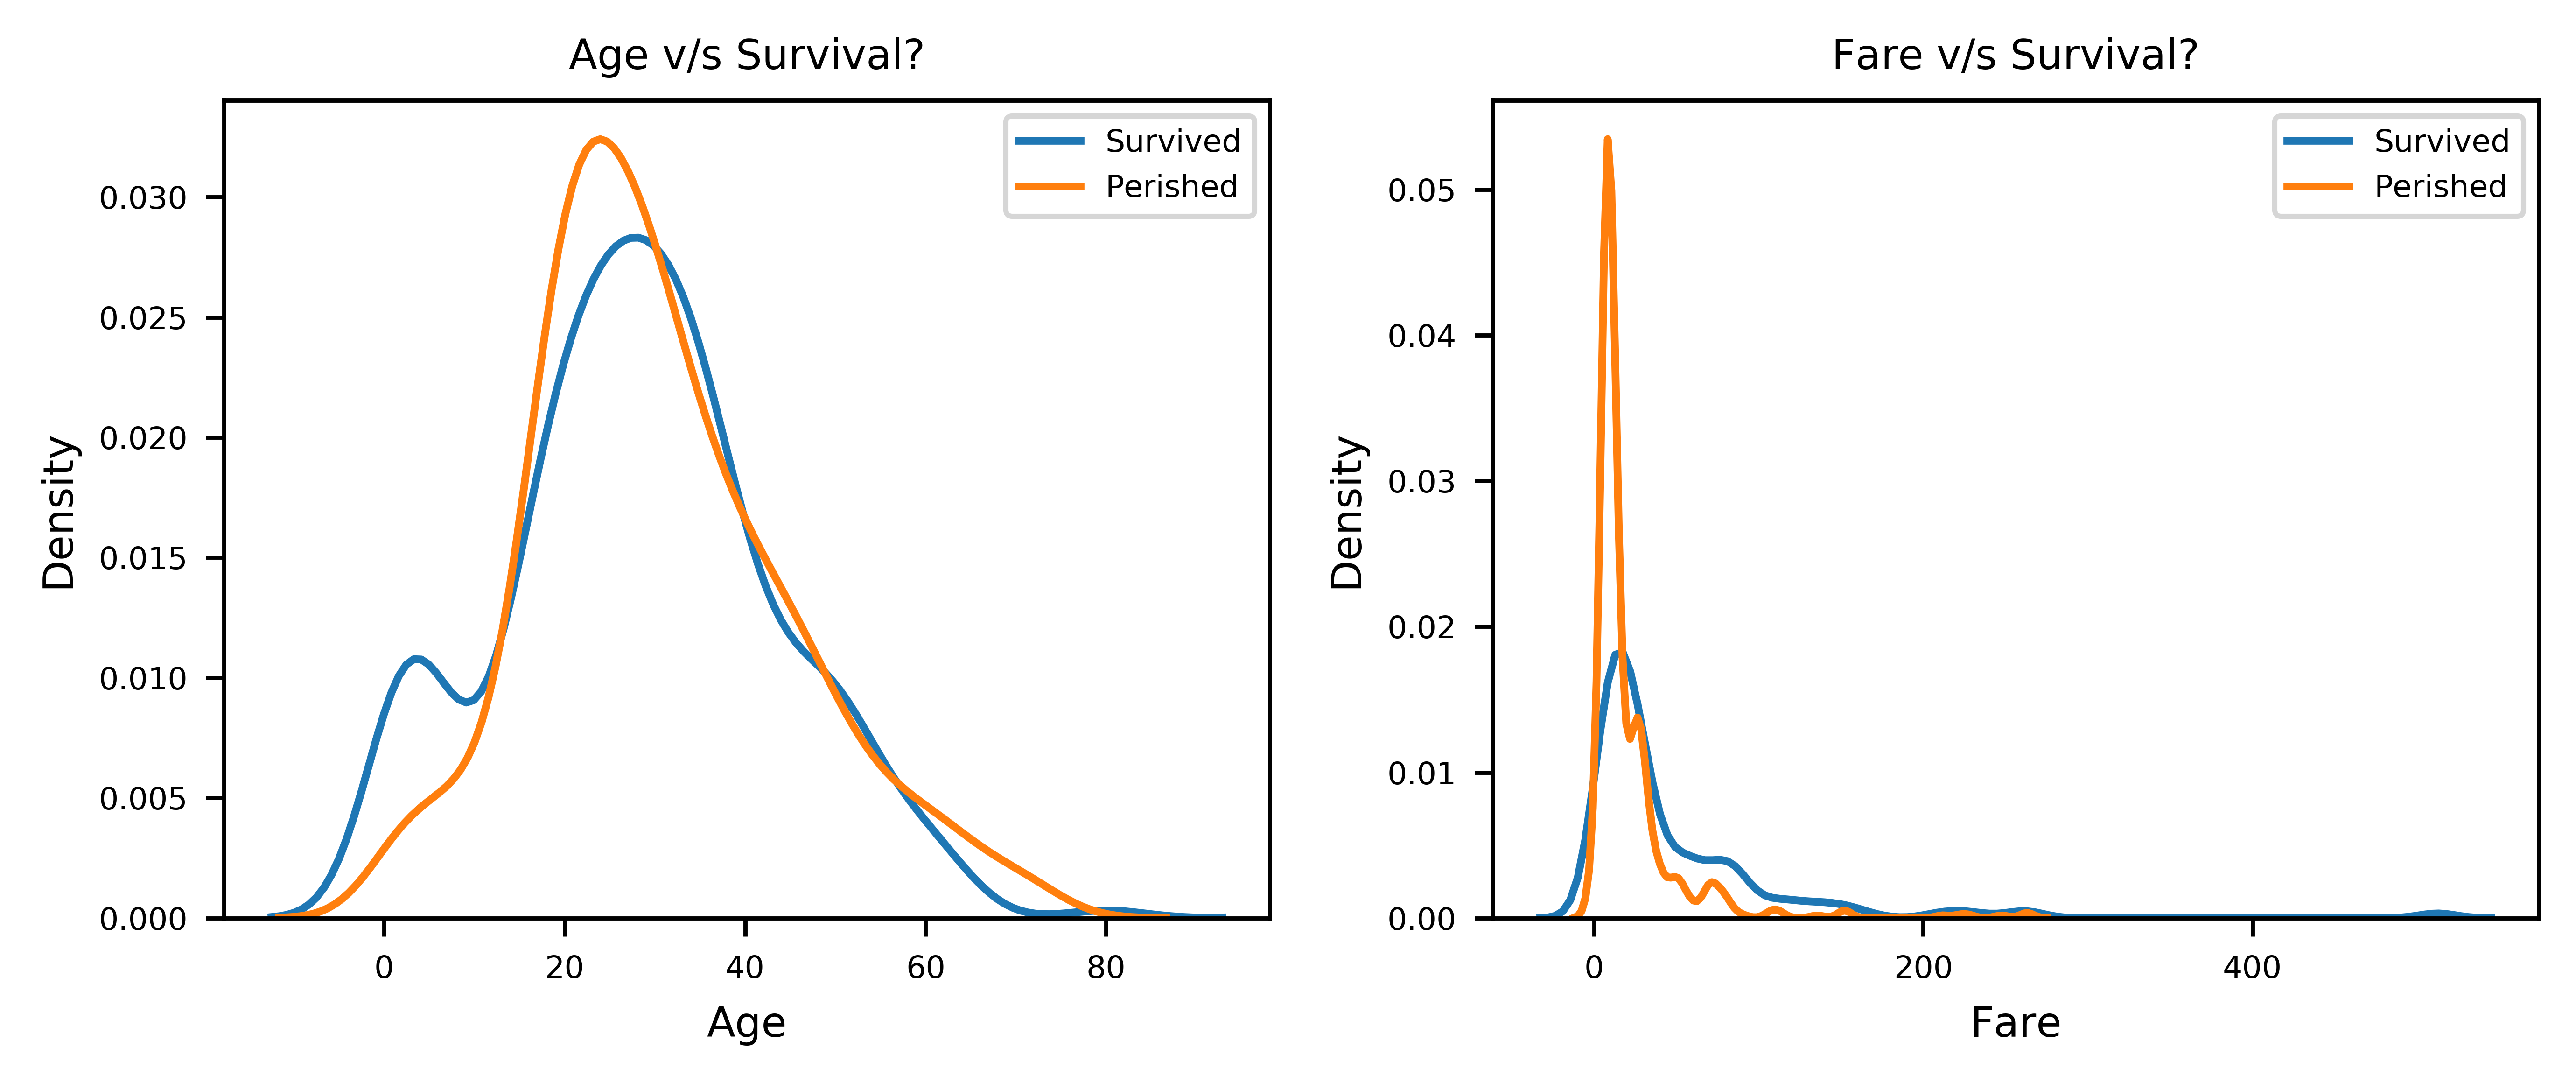

In [71]:
plt.figure(figsize = (7, 3), dpi = 800)


plt.subplot(121)
survived = train.loc[train['Survived'] == 1, ['Age']].dropna()
perished = train.loc[train['Survived'] == 0, ['Age']].dropna()
sns.distplot(survived.Age, hist = False, label = 'Survived')
sns.distplot(perished.Age, hist = False, label = 'Perished')
plt.xlabel('Age', fontsize = 8)
plt.ylabel('Density', fontsize = 8)
plt.title('Age v/s Survival?', fontsize = 8)
plt.legend(fontsize = 6)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)

plt.subplot(122)
survived = train.loc[train['Survived'] == 1, ['Fare']].dropna()
perished = train.loc[train['Survived'] == 0, ['Fare']].dropna()
sns.distplot(survived.Fare, hist = False, label = 'Survived')
sns.distplot(perished.Fare, hist = False, label = 'Perished')
plt.xlabel('Fare', fontsize = 8)
plt.ylabel('Density', fontsize = 8)
plt.title('Fare v/s Survival?', fontsize = 8)
plt.legend(fontsize = 6)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)

plt.tight_layout()
plt.show()


#### Observations
When compared to the overall chance of survival (~38%), interesting insights emerge:
<ol>
    <li> Chance of survival was dramatically better for passengers in the first class (~63%) than those in the third class (~24%), with the second class passengers also having significantly better chance of survival (~47%) than those in third class.
    <li> Women had a dramatically better chance of survival (~74%) than men (~19%).
    <li> Passengers embarking from port C had much better chance of survival (~55%) than those embarking from the other two ports (~34%-39%).
    <li> It helps to have siblings on board. Those with siblings on board had better chance of survival (~47%) than those that didn't (~35%).
    <li> Similarly, it helps if families are travelling together. Those with familes on board had better chance of survival (~51%) than those that didn't (~34%).
    <li> Surprisingly the chance of survival does not vary meaninfully either with the <code>Age</code> or <code>Fare</code>.
</ol>

### Imputing Missing Data
<ol>
    <li> Data is missing in both the <i>train</i> and the <i>test</i> datasets. To impute missing data in two datasets, since both datasets come from the same universe, it makes sense to combine them and treat them as a single dataset.
    <li> It would also be important to identify correlation between the features. Strong correlation between pairs of features would inform the strategy to use when imputing missing data. We do this specifically for those features that report missing data i.e. <code>Age, Fare, Embarked</code>.
    <li> Even though <code>Cabin</code> reports missing data, since we don't believe <code>string</code>-type feature affects the chance of survival, we ignore the effort to impute missing data for this feature.
</ol>

In [72]:
dat = train.append(test, sort = False)

#### Visualizing the Correlation between Features
##### Age v/s Fare

In [73]:
dat[['Age', 'Fare']].corr()

,Age,Fare
Age,1.00000,0.17874
Fare,0.17874,1.00000


##### Age v/s Categorical Features

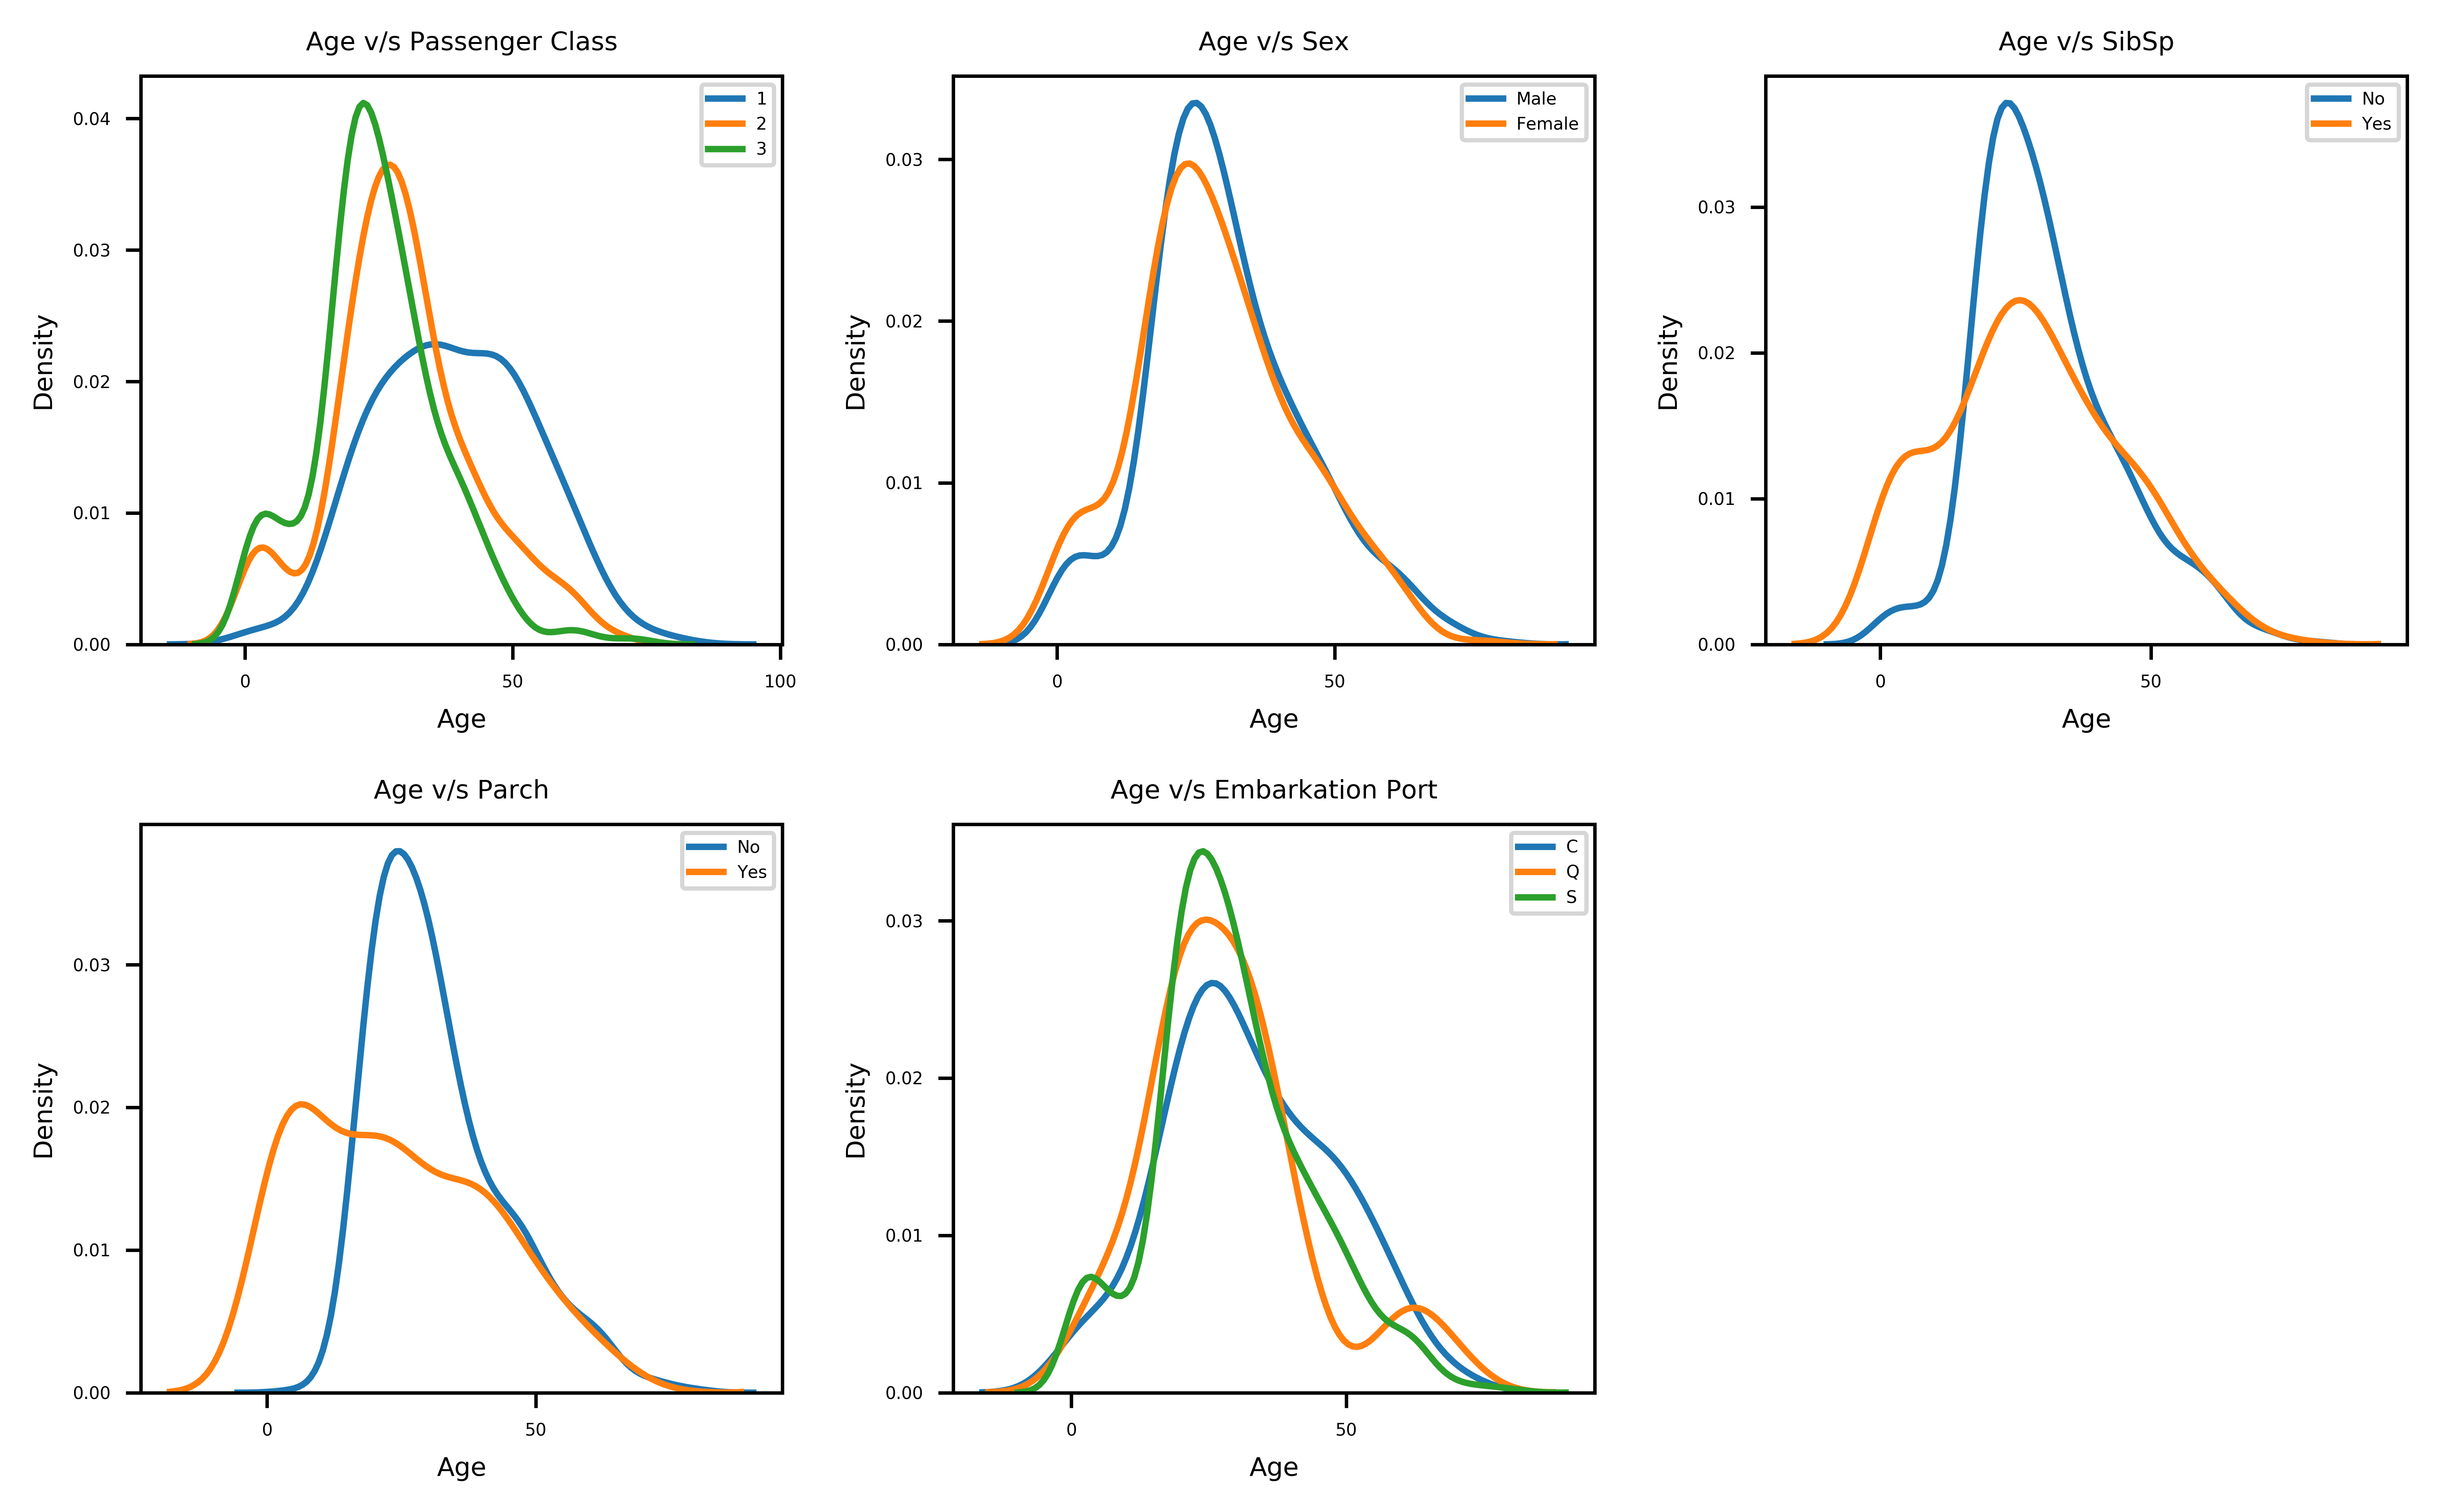

In [74]:
plt.figure(figsize = (8, 5), dpi = 800)

plt.subplot(2,3,1)

subdat = dat.loc[dat['Pclass'] == 1, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "1")
subdat = dat.loc[dat['Pclass'] == 2, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "2")
subdat = dat.loc[dat['Pclass'] == 3, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "3")
plt.xlabel('Age', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Age v/s Passenger Class', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,2)

subdat = dat.loc[dat['Sex'] == 'male', ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "Male")
subdat = dat.loc[dat['Sex'] == 'female', ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "Female")
plt.xlabel('Age', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Age v/s Sex', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,3)

subdat = dat.loc[dat['SibSp'] == 0, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "No")
subdat = dat.loc[dat['SibSp'] == 1, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "Yes")
plt.xlabel('Age', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Age v/s SibSp', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,4)

subdat = dat.loc[dat['Parch'] == 0, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "No")
subdat = dat.loc[dat['Parch'] == 1, ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "Yes")
plt.xlabel('Age', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Age v/s Parch', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,5)

subdat = dat.loc[dat['Embarked'] == 'C', ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "C")
subdat = dat.loc[dat['Embarked'] == 'Q', ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "Q")
subdat = dat.loc[dat['Embarked'] == 'S', ['Age']].dropna()
sns.distplot(subdat, hist = False, label = "S")
plt.xlabel('Age', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Age v/s Embarkation Port', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.tight_layout()
plt.show()

##### Fare v/s Categorical Features

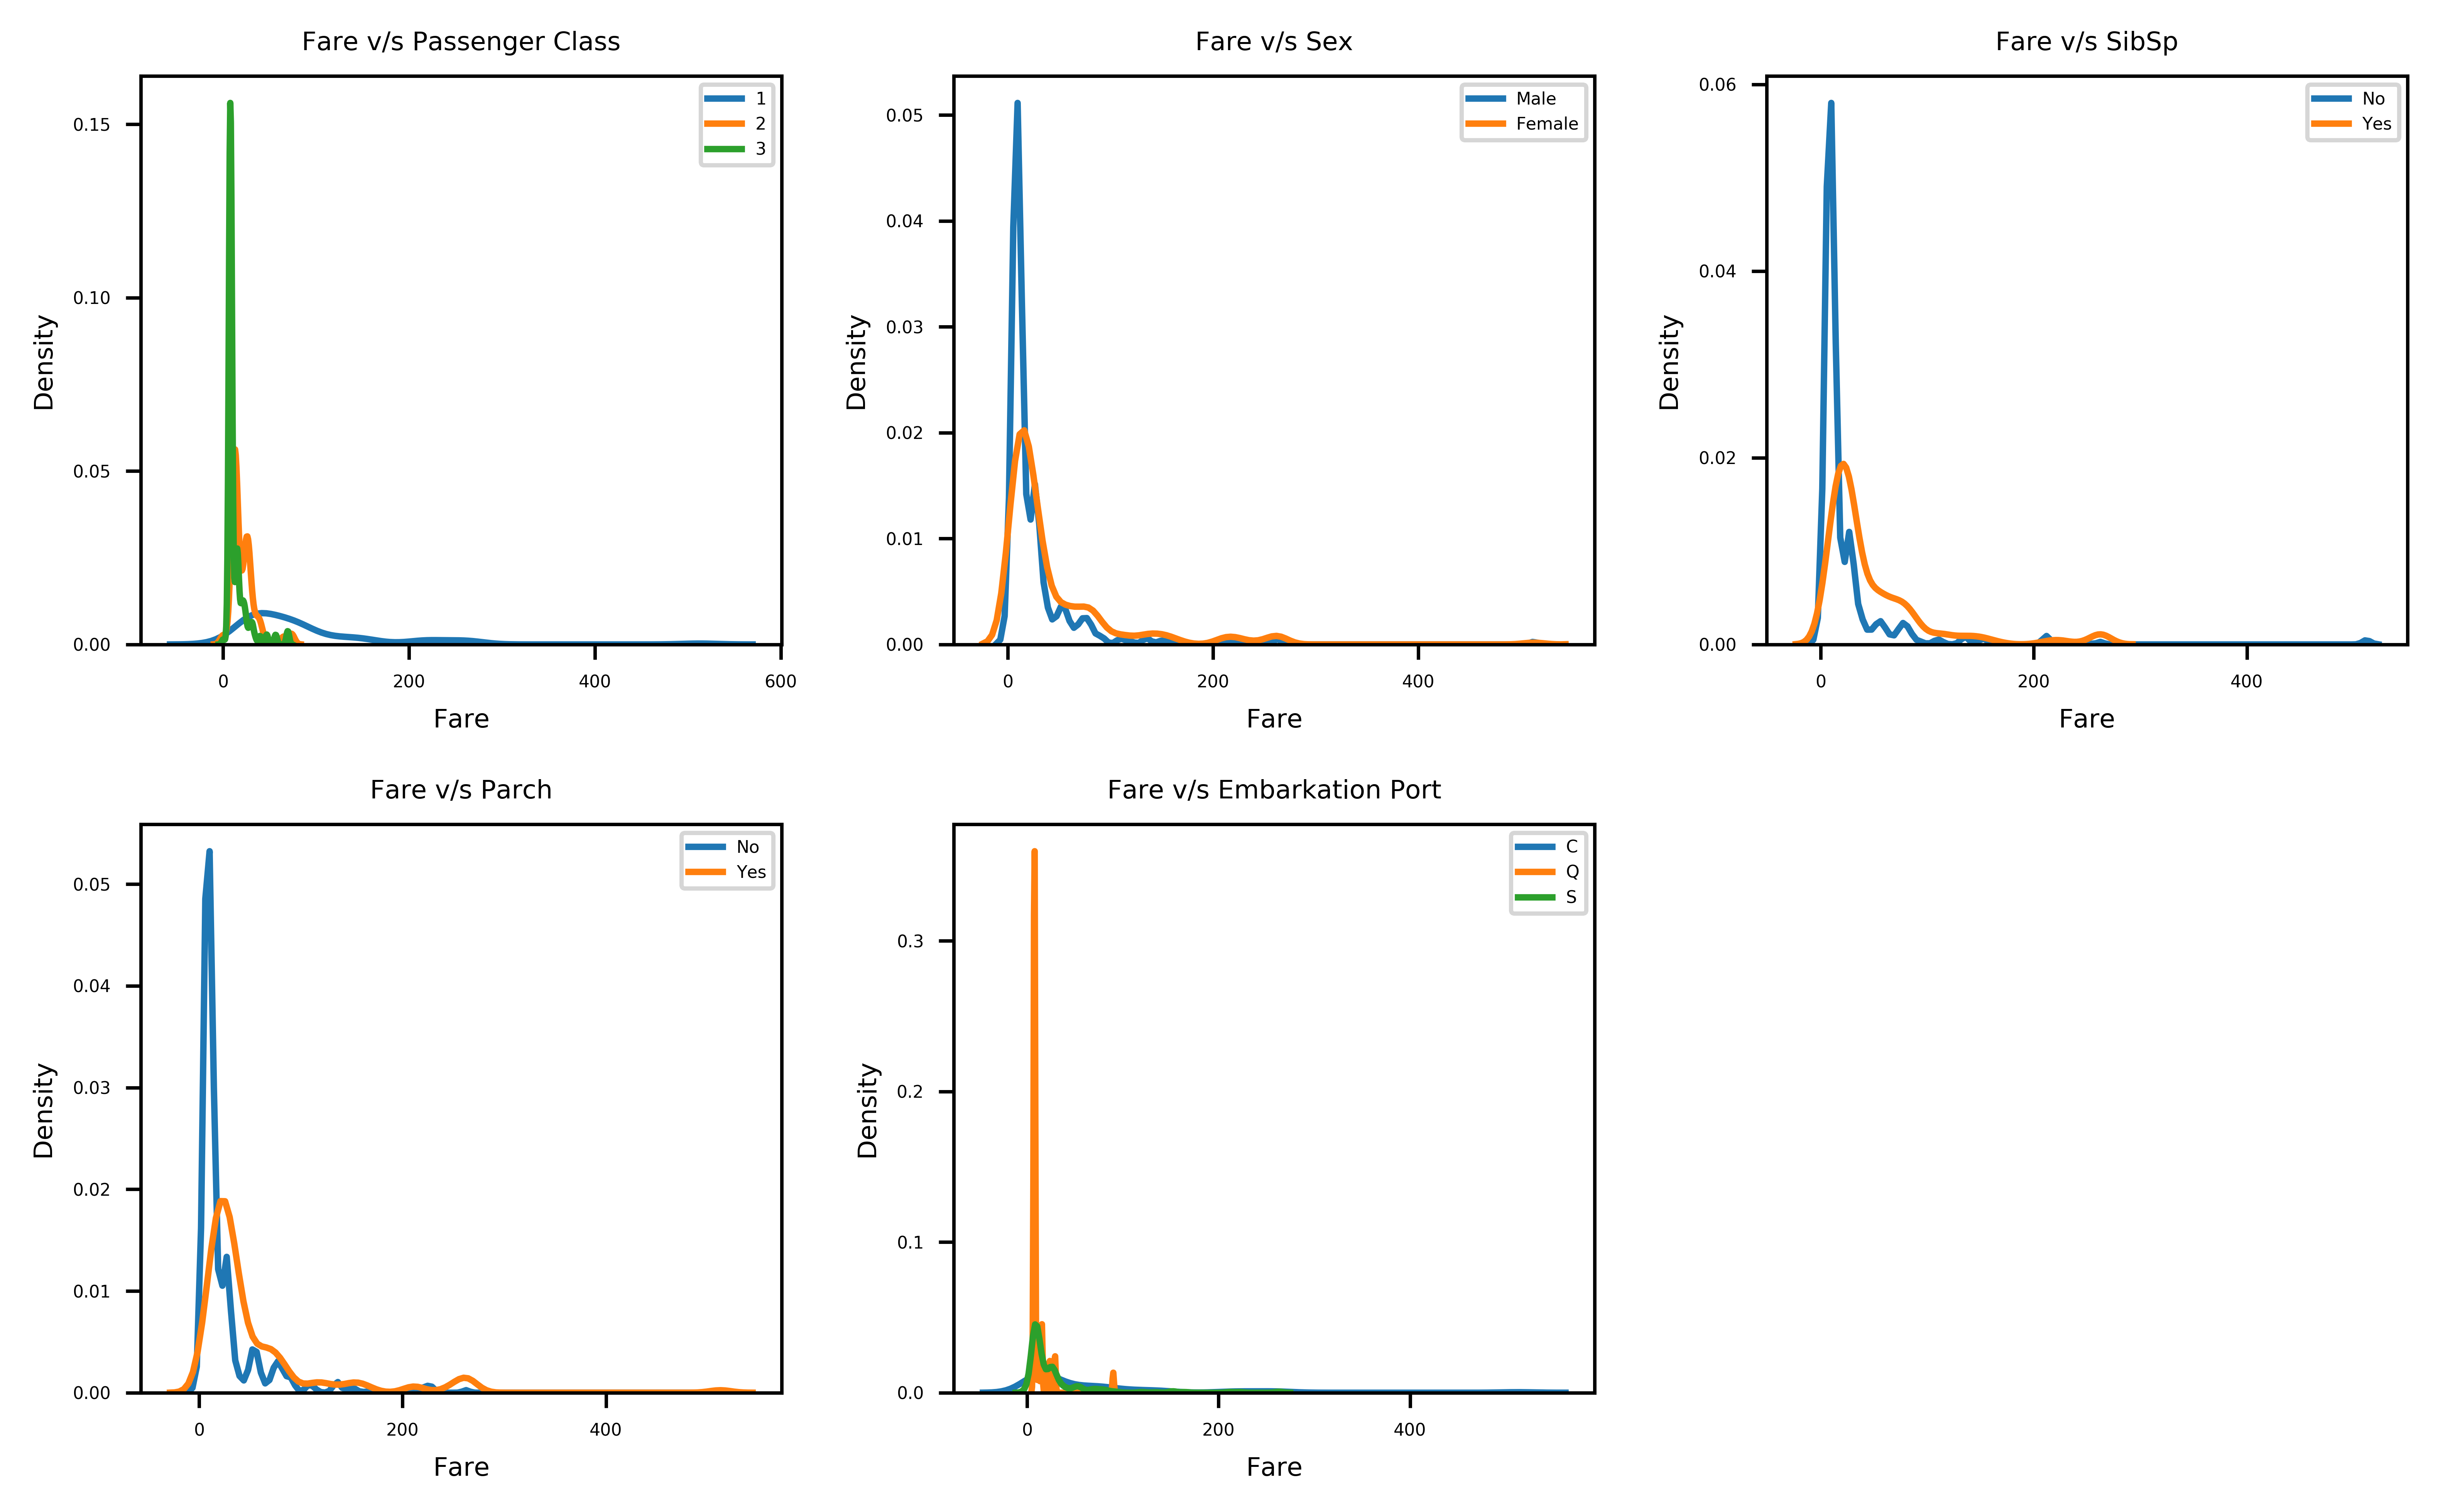

In [75]:
#Density distribution for Fare
plt.figure(figsize = (8, 5), dpi = 800)

plt.subplot(2,3,1)

subdat = dat.loc[dat['Pclass'] == 1, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "1")
subdat = dat.loc[dat['Pclass'] == 2, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "2")
subdat = dat.loc[dat['Pclass'] == 3, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "3")
plt.xlabel('Fare', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Fare v/s Passenger Class', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,2)

subdat = dat.loc[dat['Sex'] == 'male', ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "Male")
subdat = dat.loc[dat['Sex'] == 'female', ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "Female")
plt.xlabel('Fare', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Fare v/s Sex', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,3)

subdat = dat.loc[dat['SibSp'] == 0, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "No")
subdat = dat.loc[dat['SibSp'] == 1, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "Yes")
plt.xlabel('Fare', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Fare v/s SibSp', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,4)

subdat = dat.loc[dat['Parch'] == 0, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "No")
subdat = dat.loc[dat['Parch'] == 1, ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "Yes")
plt.xlabel('Fare', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Fare v/s Parch', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.subplot(2,3,5)

subdat = dat.loc[dat['Embarked'] == 'C', ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "C")
subdat = dat.loc[dat['Embarked'] == 'Q', ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "Q")
subdat = dat.loc[dat['Embarked'] == 'S', ['Fare']].dropna()
sns.distplot(subdat, hist = False, label = "S")
plt.xlabel('Fare', fontsize = 6)
plt.ylabel('Density', fontsize = 6)
plt.title('Fare v/s Embarkation Port', fontsize = 6)
plt.legend(fontsize = 4)
plt.xticks(fontsize = 4)
plt.yticks(fontsize = 4)

plt.tight_layout()
plt.show()

##### Embarked v/s Categorical Variables

In [76]:
pd.crosstab(index = dat['Embarked'], columns = dat['Pclass'], normalize = 'columns', margins = True)

Pclass,1,2,3,All
Embarked,,,,
C,0.439252,0.101083,0.142454,0.206580
Q,0.009346,0.025271,0.159379,0.094109
S,0.551402,0.873646,0.698166,0.699311


In [77]:
pd.crosstab(index = dat['Embarked'], columns = dat['Sex'], normalize = 'columns', margins = True)

Sex,female,male,All
Embarked,,,
C,0.243534,0.186240,0.206580
Q,0.129310,0.074733,0.094109
S,0.627155,0.739027,0.699311


In [78]:
pd.crosstab(index = dat['Embarked'], columns = dat['SibSp'], normalize = 'columns', margins = True)

SibSp,0,1,All
Embarked,,,
C,0.192351,0.236842,0.206580
Q,0.112486,0.055024,0.094109
S,0.695163,0.708134,0.699311


In [79]:
pd.crosstab(index = dat['Embarked'], columns = dat['Parch'], normalize = 'columns', margins = True)

Parch,0,1,All
Embarked,,,
C,0.196,0.241042,0.206580
Q,0.114,0.029316,0.094109
S,0.690,0.729642,0.699311


#### Observations
<ol>
    <li> <code>Age</code> and <code>Fare</code> are not correlated.
    <li> <code>Age</code> is correlated to <code>Pclass</code> and <code>SibSp</code>.
    <li> <code>Fare</code> is correlated to <code>Pclass, Parch</code> and <code>SibSp</code>.
    <li> <code>Embarked</code> is correlated to <code>Pclass</code> and <code>Sex</code>.
</ol>
To impute missing data for a target feature:
<ol>
    <li> Ascertain the values of the corresponding correlated features for records with target feature value missing.
    <li> Select the subgroup of data with these ascertained values for correlated features and with target feature value available and for such subgroup calculate the mean of the target feature (if it is <code>numeric</code>) or the mode (if it is <code>categorical</code>).
    <li> Impute these mean or mode values to those records with missing target feature values.

In [80]:
dat.loc[dat['Embarked'].isna(), ['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).size().rename('Count').reset_index()

,Pclass,Sex,Count
0,1,female,2


In [81]:
dat.loc[dat['Fare'].isna(), ['Pclass', 'Sex', 'Parch']].groupby(['Pclass', 'Sex', 'Parch']).size().rename('Count').reset_index()

,Pclass,Sex,Parch,Count
0,3,male,0,1


In [82]:
dat.loc[dat['Age'].isna(), ['Pclass', 'SibSp']].groupby(['Pclass', 'SibSp']).size().rename('Count').reset_index()

,Pclass,SibSp,Count
0,1,0,33
1,1,1,6
2,2,0,16
3,3,0,157
4,3,1,51


#### Observations
<ol>
    <li> For <code>Embarked</code>, the missing records are from the same subgroup. We use the relevant subgroup's mode value to impute missing data. 
    <li> For the single record with missing <code>Fare</code> data, we use the median value of the relevant subgroup to impute the missing data.
    <li> For <code>Age</code>, the missing records are distributed across 5 subgroups. We use the relevant subgroup's median value to impute missing data.

In [83]:
foo = dat.query('Pclass == 1 and Sex == "female"')['Embarked'].dropna().mode()
dat.loc[dat['Embarked'].isna(), ['Embarked']] = foo[0]

In [84]:
foo = dat.query('Pclass == 3 and Sex == "male"')['Fare'].dropna().mean()
dat.loc[dat['Fare'].isna(), ['Fare']] = foo

In [85]:
foo = dat.query('Pclass == 1 and SibSp == 0')['Age'].dropna().mean()
dat.loc[(dat['Pclass'] == 1) & (dat['SibSp'] == 0) & (dat['Age'].isna()), ['Age']] = foo

foo = dat.query('Pclass == 1 and SibSp == 1')['Age'].dropna().mean()
dat.loc[(dat['Pclass'] == 1) & (dat['SibSp'] == 1) & (dat['Age'].isna()), ['Age']] = foo

foo = dat.query('Pclass == 2 and SibSp == 0')['Age'].dropna().mean()
dat.loc[(dat['Pclass'] == 2) & (dat['SibSp'] == 0) & (dat['Age'].isna()), ['Age']] = foo

foo = dat.query('Pclass == 3 and SibSp == 0')['Age'].dropna().mean()
dat.loc[(dat['Pclass'] == 3) & (dat['SibSp'] == 0) & (dat['Age'].isna()), ['Age']] = foo

foo = dat.query('Pclass == 3 and SibSp == 1')['Age'].dropna().mean()
dat.loc[(dat['Pclass'] == 3) & (dat['SibSp'] == 1) & (dat['Age'].isna()), ['Age']] = foo

In [86]:
dat.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

### Final Cleansing and Baselining Data
<ol>
    <li> In fitting a model to the data we will only need the <code>numerical</code> and <code>categorical</code> features i.e. <code>Pclass, Sex, Age, SibSp, Parch, Fare, Embarked</code> and hence we drop the remaining features from the dataset.
    <li> Most learning algorithms require the <code>categorigal</code> variables be <i>one-hot-encoded</i>. Hence we one-hot-encode <code>Pclass, Sex, SibSp, Parch, Embarked</code>.
    <li> Most learning algorithms perform better if the <code>numerical</code> features are <i>centered and scaled</i>. Hence we center and scale <code>Age</code> and <code>Fare</code>.
    <li> We save the <i>cleaned</i> and <i>processed</i> <code>X_train, y_train, X_test</code> for subsequent processing.
</ol>

In [87]:
y_train = dat.iloc[:train.shape[0]]['Survived'].astype('category')

feat_in_model = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

dat = dat[feat_in_model]
dat = pd.get_dummies(dat)
dat[['Age', 'Fare']] = StandardScaler().fit_transform(dat[['Age', 'Fare']])
X_train = dat.iloc[:train.shape[0]]
X_test = dat.iloc[train.shape[0]:]

X_train.to_hdf('../wip-data/X_train.h5', key = 'df',format = 'table')
X_test.to_hdf('../wip-data/X_test.h5', key = 'df', format = 'table')
y_train.to_hdf('../wip-data/y_train.h5', key = 'df', format = 'table')